In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import os
import yaml

Epoch 1/100


/home/lucaserf/tiniMLVM/experiments_venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0133
Epoch 1: val_loss improved from inf to 0.00730, saving model to best_model.keras
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0132 - val_loss: 0.0073
Epoch 2/100
211/215 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0053
Epoch 2: val_loss improved from 0.00730 to 0.00531, saving model to best_model.keras
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0053 - val_loss: 0.0053
Epoch 3/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0044
Epoch 3: val_loss improved from 0.00531 to 0.00437, saving model to best_model.keras
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0044 - val_loss: 0.0044
Epoch 4/100
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0037
Epoch 4: val_loss improved from 0.00437 to 0.00401, saving model to best_model.keras
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0037 - val_loss: 0.0040
Epoch 5/100
211/215 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0032
Epoch 5: val_loss improved f

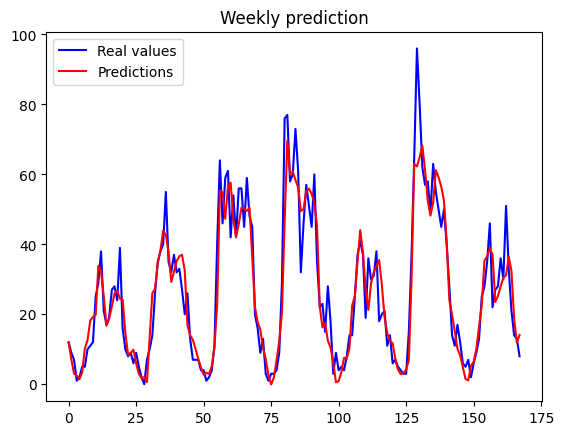

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━

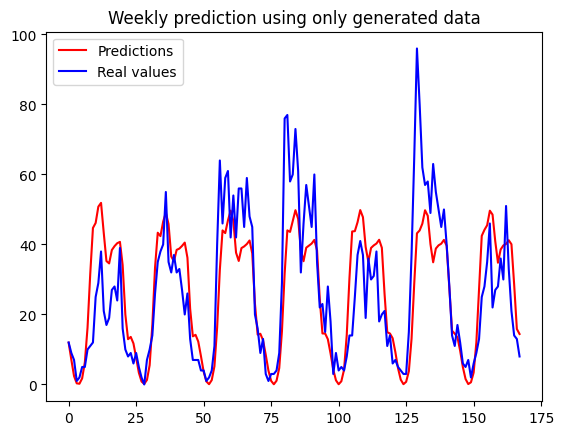

In [ ]:
#load the dataset

df = pd.read_csv("./sensor_data/spire_5_[44.4901162203284, 11.3398356513878].csv")

#train the model
X_data = []
y_data = []

seed = 42
#set seed tensorflow backend

tf.keras.utils.set_random_seed(seed)
np.random.seed(seed)


previous_values = 24

for i in range(previous_values, len(df)):
    X_data.append(df.iloc[i - previous_values:i, 0].values)
    y_data.append(df.iloc[i, 0])

X_data, y_data = np.array(X_data), np.array(y_data)

#normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))

X_data = scaler.fit_transform(X_data)
y_data = scaler.fit_transform(y_data.reshape(-1, 1))


#take the last week for testing
X_test = X_data[-24*7:]
y_test = y_data[-24*7:]

#division of the dataset for training and validation
X_train = X_data[:-24*7]
y_train = y_data[:-24*7]
#shuffle the training data

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


#define callbacks for early stopping with validation loss

#keep best model

callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=3,
        verbose=1,
    )
    ,tf.keras.callbacks.ModelCheckpoint(
        filepath='best_model.keras',
        monitor='val_loss',
        save_best_only=True,
        verbose=1,
    )
]


model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(32, input_shape=(previous_values,1), return_sequences=True),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')



model.fit(X_train, y_train, epochs=100, batch_size=32, callbacks=callbacks, shuffle=True, validation_split=0.2)

#load the best model
model = tf.keras.models.load_model('best_model.keras')

model.evaluate(X_test, y_test)

#show the predictions on the test set

predictions = model.predict(X_test)

predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

plt.plot(y_test, color='blue', label='Real values')

plt.plot(predictions, color='red', label='Predictions')

plt.legend()
plt.title(f"Weekly prediction")

plt.show()

#continuos prediction using only generated data
current_state = X_test[0]
current_state = np.reshape(current_state, (1,previous_values, 1))
continuos_predictions = []
for i in range(24*7):
    prediction = model.predict(current_state)
    continuos_predictions.append(prediction[0][0])
    current_state = np.append(current_state[0][1:], prediction[0][0])
    current_state = np.reshape(current_state, (1,previous_values, 1))
continuos_predictions = scaler.inverse_transform(np.array(continuos_predictions).reshape(-1, 1))

plt.plot(continuos_predictions, color='red', label='Predictions')
plt.plot(y_test, color='blue', label='Real values')
plt.legend()

plt.title(f"Weekly prediction using only generated data")
plt.show()

In [ ]:
#load the dataset

df = pd.read_csv("./sensor_data/spire_5_[44.4901162203284, 11.3398356513878].csv")

#train the model
X_data = []
y_data = []

seed = 42
#set seed tensorflow backend

tf.keras.utils.set_random_seed(seed)
np.random.seed(seed)


previous_values = 24

for i in range(previous_values, len(df)):
    X_data.append(df.iloc[i - previous_values:i, 0].values)
    y_data.append(df.iloc[i, 0])

X_data, y_data = np.array(X_data), np.array(y_data)

#normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))

X_data = scaler.fit_transform(X_data)
y_data = scaler.fit_transform(y_data.reshape(-1, 1))


#take the last week for testing
X_test = X_data[-24*7:]
y_test = y_data[-24*7:]

#division of the dataset for training and validation
X_train = X_data[:-24*7]
y_train = y_data[:-24*7]
#shuffle the training data

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))



#train a gpt model



Creating animation...


/tmp/ipykernel_1481829/1333459316.py:46: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  line2, = ax.plot(time_generated, stored_generated_sequences_ppo[0].flatten(), 'b-', label=f'Pretrained generation', color = 'orange')


Animation saved successfully as generation_evolution_ppo_sampling_sparse.gif


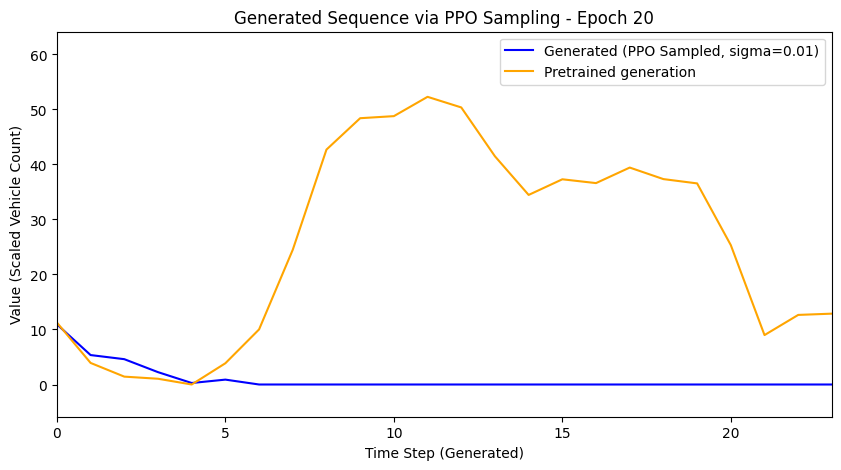

In [50]:
import matplotlib.animation as animation


stored_generated_sequences_ppo = [] # Clear the list to free memory

folder_path = "./generated_data/20250416_163729"

#load all sequences in the folder named generated_sequence_{i}.csv

ls = os.listdir(folder_path)

#filter files that start with generated

generated_files = [f for f in ls if f.startswith("generated_sequence_") and f.endswith(".csv")]

#sort the files by the number in the name
generated_files.sort(key=lambda x: int(x.split("_")[2].split(".")[0]))

for i, file in enumerate(generated_files):
    file_path = os.path.join(folder_path, file)
    #load the sequence
    seq = pd.read_csv(file_path, header=None).values
    #append to the list
    stored_generated_sequences_ppo.append(seq)

#read yaml file
parameters_file = os.path.join(folder_path, "params.yaml")
with open(parameters_file, 'r') as file:
    parameters = yaml.safe_load(file)

NUM_STEPS_TO_GENERATE = parameters['NUM_STEPS_TO_GENERATE']
SAMPLING_SIGMA = parameters['SAMPLING_SIGMA']

#upload pretrained_sequence
pretrained_sequence = pd.read_csv(os.path.join(folder_path, "pretrained_sequence_0.csv"), header=None).values

# --- Create GIF ---
print("Creating animation...")
if stored_generated_sequences_ppo: # Check if list is not empty
    fig, ax = plt.subplots(figsize=(10, 5))
    time_generated = np.arange(NUM_STEPS_TO_GENERATE)
    # Plot the first sequence to initialize the line
    line, = ax.plot(time_generated, pretrained_sequence, 'b-', label=f'Generated (PPO Sampled, sigma={SAMPLING_SIGMA})')

    #plot the reference sequence of real data (first generation)
    line2, = ax.plot(time_generated, stored_generated_sequences_ppo[0].flatten(), 'b-', label=f'Pretrained generation', color = 'orange')

    # Calculate y-limits based on stored sequences
    all_vals = np.concatenate([seq.flatten() for seq in stored_generated_sequences_ppo])
    ymin, ymax = np.min(all_vals) - 0.1 * (np.max(all_vals)-np.min(all_vals)+1e-6) - 3*SAMPLING_SIGMA, \
                 np.max(all_vals) + 0.1 * (np.max(all_vals)-np.min(all_vals)+1e-6) + 3*SAMPLING_SIGMA
    ax.set_ylim(ymin, ymax)
    ax.set_xlim(0, NUM_STEPS_TO_GENERATE - 1)

    ax.set_xlabel("Time Step (Generated)")
    ax.set_ylabel("Value (Scaled Vehicle Count)")
    ax.legend(loc='upper right')
    title = ax.set_title(f"Generated Sequence via PPO Sampling - Epoch 1")

    def update_ppo(frame):
        sequence_data = stored_generated_sequences_ppo[frame].flatten()
        line.set_ydata(sequence_data)
        #set another y_data

        title.set_text(f"Generated Sequence via PPO Sampling - Epoch {frame + 1}")
        # Update y-limits dynamically? Or keep fixed as calculated above. Fixed is usually better.
        # current_min, current_max = np.min(sequence_data), np.max(sequence_data)
        # ax.set_ylim(current_min - 0.1*(current_max-current_min+1e-6) - 3*SAMPLING_SIGMA,
        #             current_max + 0.1*(current_max-current_min+1e-6) + 3*SAMPLING_SIGMA)
        return line, title,

    ani_ppo = animation.FuncAnimation(fig, update_ppo, frames=len(stored_generated_sequences_ppo), interval=200, blit=True)
    gif_filename_ppo = 'generation_evolution_ppo_sampling_sparse.gif'

    try:
        ani_ppo.save(os.path.join(folder_path,gif_filename_ppo), writer='pillow', fps=5)
        print(f"Animation saved successfully as {gif_filename_ppo}")
    except Exception as e:
        print(f"Error saving animation: {e}")
else:
    print("No sequences generated for visualization (training might have failed).")

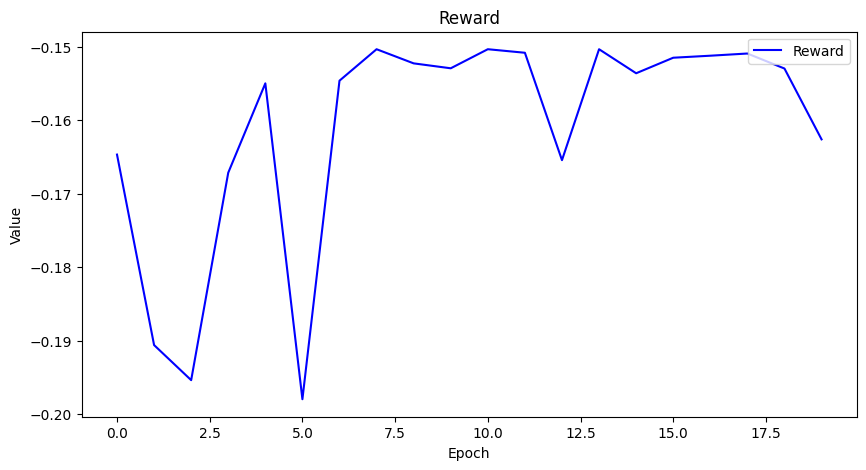

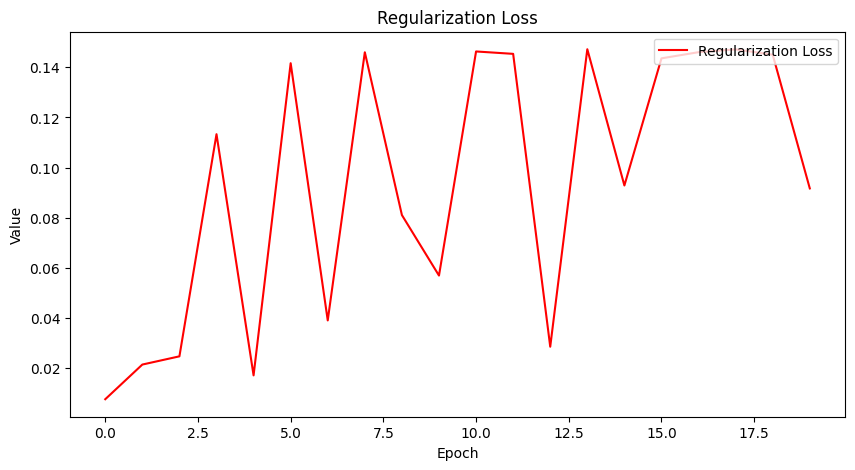

In [51]:
#plot reward and regularization

df_training = pd.read_csv(os.path.join(folder_path, "training_history.csv"))

#plot the reward and regularization loss

fig, ax = plt.subplots(figsize=(10, 5))
#plot the reward and regularization loss
ax.plot(df_training['Reward'], 'b-', label='Reward')

ax.set_xlabel("Epoch")

ax.set_ylabel("Value")
ax.legend(loc='upper right')
title = ax.set_title("Reward")

plt.show()

fig, ax = plt.subplots(figsize=(10, 5))
#plot the reward and regularization loss

ax.plot(df_training['Regularization_Loss'], 'r-', label='Regularization Loss')

ax.set_xlabel("Epoch")

ax.set_ylabel("Value")
ax.legend(loc='upper right')
title = ax.set_title("Regularization Loss")

plt.show()
